<h1>Comprendre l'analyse en composantes principales</h1>

Lorsqu’on étudie simultanément un nombre important de variables quantitatives, les individus étudiés ne sont plus représentés dans un plan, espace de dimension 2, mais dans un espace de dimension plus importante. 
L’objectif de l’Analyse en Composantes Principales (ACP) est
de revenir à un espace de dimension réduite (par exemple 2) en déformant le moins possible la réalité. 
Il s’agit donc d’obtenir le résumé le plus pertinent possible des données initiales.
C’est la matrice des variances-covariances (ou celle des corrélations) qui va permettre de réaliser ce résumé pertinent. On va diagonaliser cette matrice afin d'obtenir les informations essentielles en plus petit nombre.

# Dépendances

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, cos, sin, pi

# Jeu de données
Le jeu de données provient du site https://husson.github.io/data.html

In [2]:
filename = "http://factominer.free.fr/livre/temperat.csv" # "/content/AnaDo_JeuDonnees_TemperatFrance.csv"
df = pd.read_csv(filename, sep=";", encoding='latin-1')
df.head()

,Unnamed: 0,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Moyenne,Amplitude,Latitude,Longitude,Région
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Athènes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est


In [3]:
# Mise en index des villes
df = df.set_index('Unnamed: 0')
villes = df.index.to_list()
villes

['Amsterdam',
 'Athènes',
 'Berlin',
 'Bruxelles',
 'Budapest',
 'Copenhague',
 'Dublin',
 'Helsinki',
 'Kiev',
 'Cracovie',
 'Lisbonne',
 'Londres',
 'Madrid',
 'Minsk',
 'Moscou',
 'Oslo',
 'Paris',
 'Prague',
 'Reykjavik',
 'Rome',
 'Sarajevo',
 'Sofia',
 'Stockholm',
 'Anvers',
 'Barcelone',
 'Bordeaux',
 'Edimbourg',
 'Francfort',
 'Genève',
 'Gènes',
 'Milan',
 'Palerme',
 'Séville',
 'St. Pétersbourg',
 'Zurich']

A partir de ce jeu de données, on ne conserve que les variables "Janvier" à "Décembre". Les variables "latitude", "longitude", "moyenne" et "amplitude" serviront à expliquer les axes principaux. 

In [20]:
# On ne conserve du dataframe d'origine que les 12 premières variables 
# (Colonnes Janvier à décembre)
data = df.iloc[:,0:-5]

# Mise des variables sous forme d'une liste.
variables = data.columns.to_list()

# Variables explicatives
var_explicatives=df.columns[-5:-1]
print(var_explicatives)

# Nombre de variables
K = len(variables)
for c in variables:
  print(c, end='\t')

# Réduction des données (retrancher la moyenne de chaque colonne et diviser par l'écart-type)
for c in variables:
  moy = data[c].mean(axis=0)
  sigma = data[c].std()
  #print("columns", c, "moyenne : ", round(moy,2), "ecart-type : ", round(sigma,2))
  data[c]=(data[c]-moy)/sigma

# Vérification
"""
for c in variables:
  moy = data[c].mean(axis=0)
  sigma = data[c].std()
  print("columns :", c, " : moyenne : ", round(moy,2), "ecart-type : ", round(sigma,2))
"""

# Données sous forme d'un tableau numpy
X = np.array(data)
#X


Index(['Moyenne', 'Amplitude', 'Latitude', 'Longitude'], dtype='object')
Janvier	Février	Mars	Avril	Mai	Juin	Juillet	Août	Septembre	Octobre	Novembre	Décembre	

array([[ 0.28248662,  0.05143833,  0.09694112, -0.28447907, -0.4311573 ,
        -0.78737111, -0.7057589 , -0.50430009, -0.27530497,  0.09186261,
         0.20458122,  0.30599438],
       [ 1.40931743,  1.36077769,  1.33073722,  1.60704404,  1.89045892,
         2.13407688,  2.17562369,  2.20497168,  1.98761843,  1.89607073,
         1.86875877,  1.6346542 ],
       [-0.28092879, -0.38500812, -0.17038137, -0.28447907, -0.03403873,
        -0.42595486, -0.37006384, -0.26287984, -0.29963748, -0.23196962,
        -0.40853682, -0.33820432],
       [ 0.35518538,  0.19692048,  0.30257381, -0.10058099, -0.33951455,
        -0.54642694, -0.50993678, -0.31652878, -0.15364242,  0.02246999,
         0.13889001,  0.30599438],
       [-0.444501  , -0.25771124,  0.05581459,  0.60874018,  0.94348388,
         0.839002  ,  0.66499593,  0.62232777,  0.30867526,  0.06873174,
        -0.21146316, -0.43886036],
       [-0.31727817, -0.47593447, -0.80784269, -0.91498678, -0.85882344,
        -0.60666299, -

# Matrice de covariances et diagonalisation
On définit la matrice de covariances. Sa diagonalisation permettra de trouver les sous-espaces propres permettant de déterminer les axes principaux. 

In [5]:
S = (1./K)*np.transpose(X).dot(X) # Matrice des covariances
S[:3,:3]

array([[2.83333333, 2.80500424, 2.70822418],
       [2.80500424, 2.83333333, 2.77455144],
       [2.70822418, 2.77455144, 2.83333333]])

In [6]:
#Recherche des valeurs propres et vecteurs propres
valp, vecp = np.linalg.eig(S) # Valeurs propres, vecteurs propres

valp

array([2.95359501e+01, 3.88307986e+00, 3.41438282e-01, 1.19943445e-01,
       6.49479457e-02, 2.46053289e-02, 1.18378479e-02, 8.30258627e-03,
       4.18129115e-03, 1.06876781e-03, 2.22783001e-03, 2.41675754e-03])

In [7]:
# Petit programme simple permettant de rechercher des deux plus grandes valeurs propres.
# mais np.linalg.eig() donne déjà les valeurs propres classées de la plus grande à la plus petite. 
indice1=0
indice2=0
vp1=0
vp2=0

for k, v in enumerate(valp):
  if v>vp1:
    vp1=v
    indice1=k
  elif v>vp2:
    vp2=v
    indice2=k

print(indice1, vp1, "\n", indice2, vp2)



0 29.535950057745517 
 1 3.883079859845473


In [8]:
# Définition de la norme du vecteur tab
def norme(tab):
  s=0
  for _, v in enumerate(tab):
    s=s+v**2
  return sqrt(s)

# Définition du produit scalaire de deux vecteurs x et y
def prod_scal(x,y):
  s=0
  for k, v in enumerate(x):
    s=s+v*y[k]
  return s

# On définit la projection sur ces deux espaces vectoriels. 
# pour mémoire la projection du vecteur x sur l'espace vectoriel engendré par {e1, e2} est donnée par : 
# p(x)=<x,e1>/||e1||e1 + <x,e2>/||e2||e2 
# {e1, e2} sont les vecteurs propres associés aux deux plus grandes valeurs propres. 
def proj(x, e1=vecp[0], e2=vecp[1]):
  return prod_scal(x, e1), prod_scal(x, e2)

# Projection de chacune des villes (vecteurs-lignes) sur l'espace vectoriel engendré par {e1, e2}
vec_X = []
vec_Y = []

for i in range(len(villes)):
  x=proj(X[i][:])
  vec_X.append(x[0])
  vec_Y.append(x[1])

print(vec_X, "\n", vec_Y)


[-0.6874964663269301, 0.0024072584396426233, 0.1721105254777462, -0.6863180629647864, 0.9459059792036839, -0.05658493430622647, -1.514634332399719, 0.8981424475932175, 1.4404599845929273, 0.7443642665454285, -1.3622056952917532, -0.9009978949924591, 0.03749106546216879, 1.2180728624474917, 1.7236035526428661, 0.583844446168306, -0.4839426399630645, 0.47343163248701614, -1.3717588093993427, -0.20478145320469995, 0.24254003838199498, 0.5274835140534926, 0.40244625304887105, -0.5815941805090636, -0.6801822254616073, -0.6042877939318547, -1.2627424393612616, 0.0869468358725444, 0.10460869836374662, -0.4150602764794059, 0.7363805640940218, -0.5465525804176468, -0.4733399846736265, 1.4360053383011957, 0.056234506507080506] 
 [-0.20443985588641478, 2.4758669897058656, -0.24739681561645044, -0.16848393350884427, 0.596076846927801, -0.8970697422960132, -0.8628247859339961, -1.3641337934959528, -0.44423549769826376, -0.5767665517160573, 1.4361400362194363, -0.5381229598997356, 0.9125655579034408

# Graphique de projection des individus sur l'espace vectoriel engendré par les deux axes principaux. 

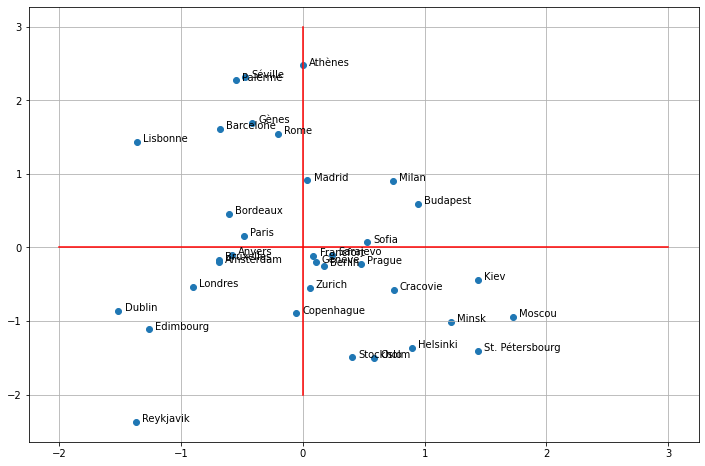

In [9]:
plt.figure(1, figsize=(12, 8))
plt.scatter(vec_X, vec_Y)
for i, txt in enumerate(villes):
    plt.annotate(txt, (vec_X[i]+0.05, vec_Y[i]))
plt.grid()
plt.plot([-2, 3], [0, 0], "red")
plt.plot([0, 0], [-2, 3], "red")
plt.show()


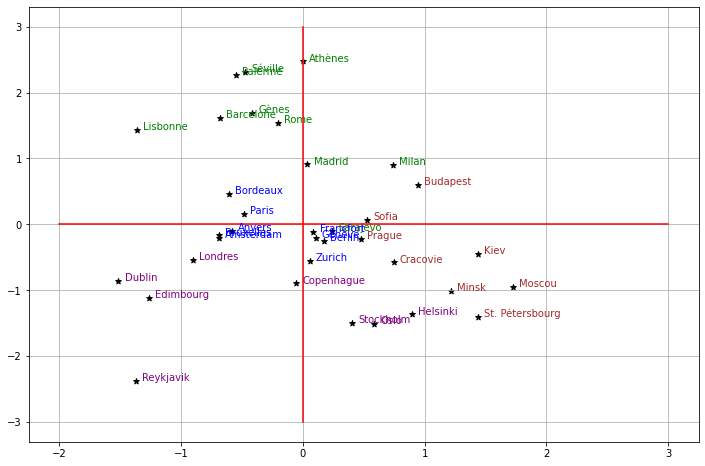

In [23]:
# On complète le code précédent en ajoutant une couleur à la ville en fonction de la région (NE, NO, SE, SO)
def couleur(ville):
  c = df[df.index==ville]['Région'][0]
  if c=="Ouest":
    return 'blue'
  if c=='Nord':
    return 'purple'
  if c=='Est':
    return 'brown'
  else:
    return 'green'

plt.figure(1, figsize=(12, 8))
plt.scatter(vec_X, vec_Y, color='black', marker="*")
for i, txt in enumerate(villes):
    plt.annotate(txt, (vec_X[i]+0.05, vec_Y[i]), color=couleur(villes[i]))
plt.grid()
plt.plot([-2, 3], [0, 0], "red")
plt.plot([0, 0], [-3, 3], "red")
plt.show()

# Cercle des corrélations

In [12]:
# Projection des variables initiales sur le plan principal : produit scalaire de x[:][j] et vec_X puis avec vec_Y
var_X = []
var_Y = []
for j in range(X.shape[1]):
  x = prod_scal(X[:][j], vec_X)/(norme(X[:][j])*norme(vec_X))
  y = prod_scal(X[:][j], vec_Y)/(norme(X[:][j])*norme(vec_Y))
  var_X.append(x/sqrt(x**2+y**2))
  var_Y.append(y/sqrt(x**2+y**2))


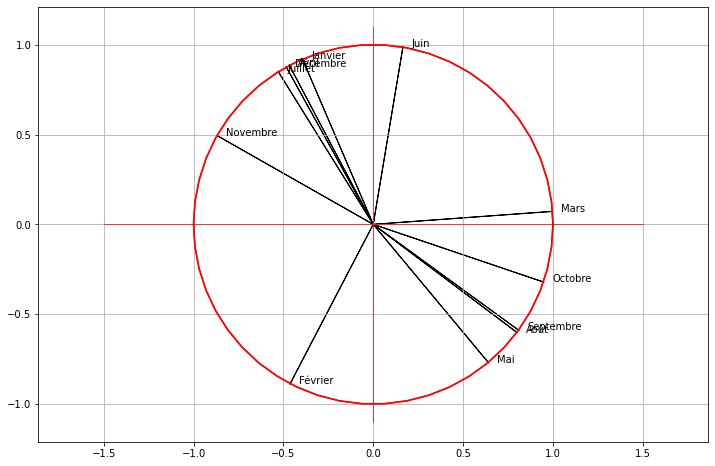

In [13]:
# Création du cercle des corrélations
cercle_X=[]
cercle_Y=[]
cercle_inf=[]
N=50

plt.figure(1, figsize=(12, 8))
for j in range(N+1):
  cercle_X.append(cos(2*pi/N*j))
  cercle_Y.append(sin(2*pi/N*j))
  cercle_inf.append(-sin(2*pi/N*j))

# Affichage des variables sous forme de flèches. 
for i, txt in enumerate(variables):
    plt.arrow(0, 0, var_X[i], var_Y[i])
    plt.annotate(txt, (var_X[i]+0.05, var_Y[i]))
  
plt.grid()
plt.axis("equal")
plt.plot(cercle_X, cercle_Y, "red")
plt.plot(cercle_X, cercle_inf, "red")
plt.plot([-1.5, 1.5], [0, 0], "red", linewidth=0.7)
plt.plot([0, 0], [-1.1, 1.1], "red", linewidth=0.7)
plt.show()

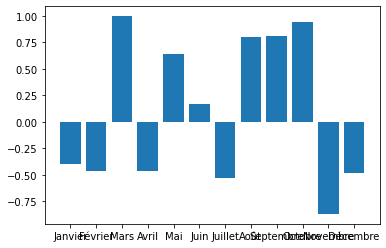

In [24]:
# Poids des variables dans la constitution du premier axe pricipal.
plt.bar(variables, var_X)
plt.show()

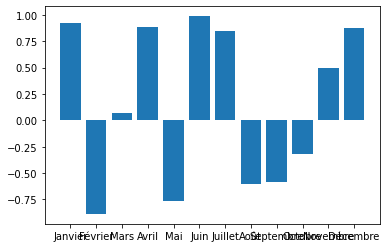

In [25]:
# Poids des variables dans la constitution du deuxième axe pricipal.
plt.bar(variables, var_Y)
plt.show()

On rajoute les variables 'longitude', 'latitude', 'amplitude' et 'moyenne' pour interpréter les deux axes principaux. 

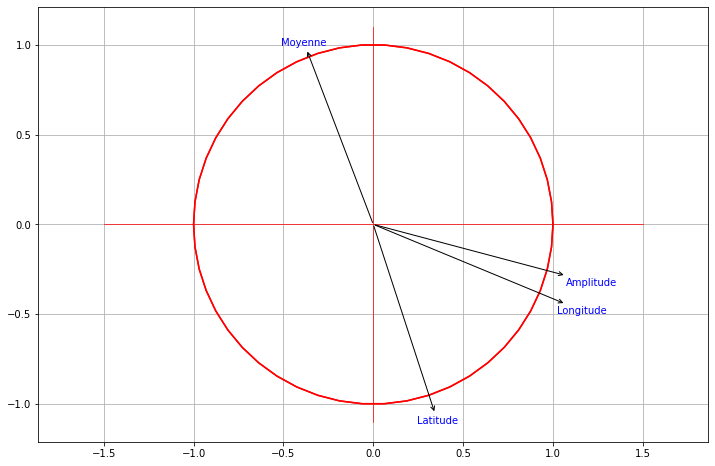

In [22]:
# Definition d'une fonction signe pour placer plus esthétiquement les étiquettes
def signe(x):
  if x>=0:
    return 2
  else:
    return -2

# Ajout des nouvelles variables 'longitude', 'latitude', 'amplitude' et 'moyenne'
plt.figure(1, figsize=(12, 8))
for c in var_explicatives:
  x = prod_scal(np.array(df[c]), vec_X)/(norme(np.array(df[c]))*norme(vec_X))
  y = prod_scal(np.array(df[c]), vec_Y)/(norme(np.array(df[c]))*norme(vec_Y))
  plt.annotate(c,xy=(0,0), xytext=(x/sqrt(x**2+y**2)+0.05*signe(x/sqrt(x**2+y**2)), \
                                   y/sqrt(x**2+y**2)+0.05*signe(y/sqrt(x**2+y**2))),  \
               color='blue', va='center', \
               arrowprops={'arrowstyle' : '<-', 'facecolor':'blue'})
  #+0.05*signe(x/sqrt(x**2+y**2)), \+0.05*signe(y/sqrt(x**2+y**2))),
plt.grid()
plt.axis("equal")
plt.plot(cercle_X, cercle_Y, "red")
plt.plot(cercle_X, cercle_inf, "red")
plt.plot([-1.5, 1.5], [0, 0], "red", linewidth=0.7)
plt.plot([0, 0], [-1.1, 1.1], "red", linewidth=0.7)
plt.show()

Nous voyons que le premier axe principal est fortement corrélé à l'amplitude thermique. Cela signifie que les villes situées dans la partie droite du graphique de projection ont une forte amplitude thermique tandis que les villes situées dans la partie gauche du graphique ont une faible amplitude thermique.
De la même manière, le deuxième axe principal est fortement corrélé à la moyenne des températures et inversement corrélé à la latitude. Cela signifie que les villes situées dans la partie haute du graphique de projection ont une moyenne des températures élevée et sont situées à de faibles latitudes tandis que les villes situées dans la partie basse du graphique des projections ont une plus faible moyenne des températures et sont situées à de plus fortes latitudes. 

# Choix du nombre de composantes principales

### Part d'inertie expliquée
Elle est représentée par la somme des valeurs propres retenues divisées par la somme des toutes les valeurs propres. 

In [15]:
for i in range(valp.shape[0]):
  r=sum(valp[:i+1])/sum(valp)
  print("Part d'inertie expliquée par ", i+1, "valeurs propres : ", r)

Part d'inertie expliquée par  1 valeurs propres :  0.868704413463103
Part d'inertie expliquée par  2 valeurs propres :  0.9829126446350287
Part d'inertie expliquée par  3 valeurs propres :  0.9929549470473643
Part d'inertie expliquée par  4 valeurs propres :  0.9964826954314525
Part d'inertie expliquée par  5 valeurs propres :  0.9983929291295057
Part d'inertie expliquée par  6 valeurs propres :  0.9991166152726215
Part d'inertie expliquée par  7 valeurs propres :  0.999464787270843
Part d'inertie expliquée par  8 valeurs propres :  0.9997089809847775
Part d'inertie expliquée par  9 valeurs propres :  0.999831960136271
Part d'inertie expliquée par  10 valeurs propres :  0.9998633944836965
Part d'inertie expliquée par  11 valeurs propres :  0.9999289188958888
Part d'inertie expliquée par  12 valeurs propres :  1.0


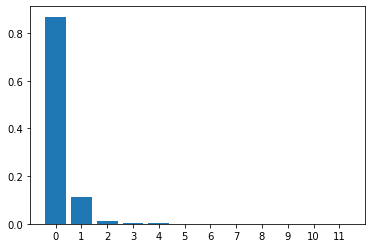

In [16]:
# Pourcentage d'information expliquée par chaque axe.
information = [v/sum(valp) for v in valp]
txt = [str(i) for i in range(len(valp))]
plt.bar(txt, information)
plt.show()

### Règle de Kaiser
On ne conserve que les valeurs propres supérieures à leur moyenne.

In [17]:
moyenne_vp = np.mean(valp)
for i in range(valp.shape[0]):
  if valp[i]>=moyenne_vp:
    print(valp[i])


29.535950057745517
3.883079859845473


### Les éboulis
On calcule la différence entre chaque valeur propre et sa suivante. Le principe consiste à rechercher, s’il existe, un “coude” (changement de signe dans la suite des différences d’ordre 2) dans le graphe et de ne conserver que les valeurs propres jusqu’à ce coude (Dans notre exemple, il n'y a pas de coude).

In [18]:
for i in range(1, valp.shape[0]-1):
  r = valp[i-1]-valp[i]
  print(r)

25.652870197900043
3.541641577826065
0.22149483696040817
0.054995499325195915
0.04034261686786483
0.012767480926404564
0.0035352616657645854
0.004121295122992491
0.003112523338305587
-0.0011590622020645099
